# Problem Statement

Education is important to a country because it improves stability, provides better opportunity and boosts the economy. SAT and ACT are used for college admission decisions. Tertiary education being one of the key factors affecting the employability and the future of a person, Department of Education is performing analysis on the country's SAT and ACT results to determine which of the states require more resources allocation and focus.

# Data import & cleaning

## Initialization

In [103]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [104]:
# Load all results
sat17 = pd.read_csv('data/sat_2017.csv')  # SAT results of 2017
sat18 = pd.read_csv('data/sat_2018.csv')  # SAT results of 2018
sat19 = pd.read_csv('data/sat_2019.csv')  # SAT results of 2019
act17 = pd.read_csv('data/act_2017.csv')  # ACT results of 2017
act18 = pd.read_csv('data/act_2018.csv')  # ACT results of 2018
act19 = pd.read_csv('data/act_2019.csv')  # ACT results of 2019

## SAT results cleaning

In [105]:
# Display sat17
sat17.head()    

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [106]:
# Check if any empty cell
sat17.isnull().sum()    

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [107]:
# Check each column's data type
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [108]:
# Rename columns to shorter name
sat17.rename(columns={'Participation':'Participation17', 'Evidence-Based Reading and Writing':'EBRW17',\
    'Math':'Math17','Total':'Total17'},inplace=True)
sat17=sat17.set_index(sat17['State'])
sat17.head()

,State,Participation17,EBRW17,Math17,Total17
State,,,,,
Alabama,Alabama,5%,593,572,1165
Alaska,Alaska,38%,547,533,1080
Arizona,Arizona,30%,563,553,1116
Arkansas,Arkansas,3%,614,594,1208
California,California,53%,531,524,1055


In [109]:
# Display sat18
sat18.head()    

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [110]:
# Check if any empty cell
sat18.isnull().sum()    

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [111]:
# Check each column's data type
sat18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [112]:
# Rename columns to shorter name
sat18.rename(columns={'Participation':'Participation18','Evidence-Based Reading and Writing':'EBRW18','Total':'Total18',\
    'EBRW':'EBRW18', 'Math':'Math18'},inplace=True)
sat18=sat18.set_index(sat18['State'])
sat18.head()

,State,Participation18,EBRW18,Math18,Total18
State,,,,,
Alabama,Alabama,6%,595,571,1166
Alaska,Alaska,43%,562,544,1106
Arizona,Arizona,29%,577,572,1149
Arkansas,Arkansas,5%,592,576,1169
California,California,60%,540,536,1076


In [113]:
# Display sat19
sat19.head()    

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [114]:
# Check if any empty cell
sat19.isnull().sum()   

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [115]:
# Check each column's data type
sat19.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [116]:
# Rename columns to shorter name
sat19.rename(columns={'Participation Rate':'Participation19','Total':'Total19','EBRW':'EBRW19',\
    'Math':'Math19'},inplace=True)
sat19 = sat19.set_index(sat19['State'])
# Convert the following columns to float data type
sat19.EBRW19=sat19.EBRW19.astype(float)
sat19.Math19=sat19.Math19.astype(float)
sat19.Total19=sat19.Total19.astype(float)
sat19.head()

,State,Participation19,EBRW19,Math19,Total19
State,,,,,
Alabama,Alabama,7%,583.0,560.0,1143.0
Alaska,Alaska,41%,556.0,541.0,1097.0
Arizona,Arizona,31%,569.0,565.0,1134.0
Arkansas,Arkansas,6%,582.0,559.0,1141.0
California,California,63%,534.0,531.0,1065.0


In [117]:
# Merge dataframes into single dataframe
satall = pd.concat([sat17, sat18], axis=1)
satall = pd.concat([satall,sat19],axis=1)
satall.tail()

,State,Participation17,EBRW17,Math17,Total17,State,Participation18,EBRW18,Math18,Total18,State,Participation19,EBRW19,Math19,Total19
State,,,,,,,,,,,,,,,
West Virginia,West Virginia,14%,558.0,528.0,1086.0,West Virginia,28%,513.0,486.0,999.0,West Virginia,99%,483.0,460.0,943.0
Wisconsin,Wisconsin,3%,642.0,649.0,1291.0,Wisconsin,3%,641.0,653.0,1294.0,Wisconsin,3%,635.0,648.0,1283.0
Wyoming,Wyoming,3%,626.0,604.0,1230.0,Wyoming,3%,633.0,625.0,1257.0,Wyoming,3%,623.0,615.0,1238.0
Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puerto Rico,—,483.0,462.0,944.0
Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Virgin Islands,—,490.0,445.0,935.0


In [118]:
# The steps below are to convert the participation rate column to float data type
satall['Participation17'] = satall['Participation17'].replace({'%':''},regex=True)
satall['Participation17'] = satall['Participation17'].str.strip()
satall['Participation17'] = satall['Participation17'].astype(float)
satall['Participation17'] = satall['Participation17']/100

In [119]:
satall['Participation18'] = satall['Participation18'].replace({'%':''},regex=True)
satall['Participation18'] = satall['Participation18'].str.strip()
satall['Participation18'] = satall['Participation18'].astype(float)
satall['Participation18'] = satall['Participation18']/100

In [120]:
satall['Participation19'] = satall['Participation19'].replace({'%':''},regex=True)
satall['Participation19'] = satall['Participation19'].str.strip()
satall['Participation19'] = satall['Participation19'].replace({'—':np.nan})
satall['Participation19'] = satall['Participation19'].astype(float)
satall['Participation19'] = satall['Participation19']/100

## ACT results cleaning

In [121]:
# Display act17
act17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [122]:
# Check if any empty cell
act17.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [123]:
# Check each column's data type
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [124]:
# Rename columns to more appropriate name
act17.rename(columns={'Participation':'Participation17','Composite':'Composite17'},inplace=True)
act17=act17.set_index(act17['State'])
act17.drop(['English','Math','Reading','Science'], axis=1, inplace=True)
act17.Composite17=act17['Composite17'].str.replace('x','')
act17.Composite17=act17.Composite17.astype(float)
act17.head() 

,State,Participation17,Composite17
State,,,
National,National,60%,21.0
Alabama,Alabama,100%,19.2
Alaska,Alaska,65%,19.8
Arizona,Arizona,62%,19.7
Arkansas,Arkansas,100%,19.4


In [125]:
# Display act18
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [126]:
# Check if any empty cell
act18.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [127]:
# Check each column's data type
act18.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [128]:
# Remove duplicated column ['State']
act18=act18.drop_duplicates(subset=['State'])
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [129]:
# Rename columns to more appropriate name
act18.rename(columns={'Participation':'Participation18','Composite':'Composite18'},inplace=True)
act18=act18.set_index(act18['State'])
act18.head()

,State,Participation18,Composite18
State,,,
Alabama,Alabama,100%,19.1
Alaska,Alaska,33%,20.8
Arizona,Arizona,66%,19.2
Arkansas,Arkansas,100%,19.4
California,California,27%,22.7


In [130]:
# Display act19
act19.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [131]:
# Check each column's data type
act19.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [132]:
# Check if any empty cell
act19.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [133]:
# Rename columns to more appropriate name
act19.rename(columns={'Participation':'Participation19','Composite':'Composite19'},inplace=True)
act19=act19.set_index(act19['State'])
act19.head()

,State,Participation19,Composite19
State,,,
Alabama,Alabama,100%,18.9
Alaska,Alaska,38%,20.1
Arizona,Arizona,73%,19.0
Arkansas,Arkansas,100%,19.3
California,California,23%,22.6


In [134]:
# Merge dataframes into single dataframe
actall=pd.concat([act17,act18],axis=1)
actall=pd.concat([actall,act19],axis=1)
actall.head()

,State,Participation17,Composite17,State,Participation18,Composite18,State,Participation19,Composite19
State,,,,,,,,,
National,National,60%,21.0,NaN,NaN,NaN,National,52%,20.7
Alabama,Alabama,100%,19.2,Alabama,100%,19.1,Alabama,100%,18.9
Alaska,Alaska,65%,19.8,Alaska,33%,20.8,Alaska,38%,20.1
Arizona,Arizona,62%,19.7,Arizona,66%,19.2,Arizona,73%,19.0
Arkansas,Arkansas,100%,19.4,Arkansas,100%,19.4,Arkansas,100%,19.3


In [135]:
# Steps below are to convert participation rate to float data type
actall['Participation17']=actall['Participation17'].replace({'%':''},regex=True)
actall['Participation17']=actall['Participation17'].str.strip()
actall['Participation17']=actall['Participation17'].astype(float)
actall['Participation17']=actall['Participation17']/100

In [136]:
actall['Participation18']=actall['Participation18'].replace({'%':''},regex=True)
actall['Participation18']=actall['Participation18'].str.strip()
actall['Participation18']=actall['Participation18'].astype(float)
actall['Participation18']=actall['Participation18']/100

In [137]:
actall['Participation19']=actall['Participation19'].replace({'%':''},regex=True)
actall['Participation19']=actall['Participation19'].str.strip()
actall['Participation19']=actall['Participation19'].astype(float)
actall['Participation19']=actall['Participation19']/100

In [138]:
# Remove duplicated State column
satall = satall.loc[:,~satall.columns.duplicated()].copy()
actall = actall.loc[:,~actall.columns.duplicated()].copy()

In [139]:
actall.reset_index(drop=True,inplace=True)
satall.reset_index(drop=True,inplace=True)

In [140]:
# Export cleaned and merged dataframe to csv.
satall.to_csv('data/sat_2017_to_2019.csv')
actall.to_csv('data/act_2017_to_2019.csv')

# Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**State**|*string*|satall & actall|The States in USA.| 
|**Participation17**|*float*|satall & actall|The participation rate in year 2017.|
|**EBRW17**|*float*|satall|The average Evidence-Based Reading and Writing score in year 2017.|
|**Math17**|*float*|satall|The average Math score in year 2017.|
|**Total17**|*float*|satall|The total average SAT score in year 2017.|
|**Participation18**|*float*|satall & actall|The participation rate in year 2018.|
|**EBRW18**|*float*|satall|The average Evidence-Based Reading and Writing score in year 2018.|
|**Math18**|*float*|satall|The average Math score in year 2018.|
|**Total18**|*float*|satall|The total average SAT score in year 2018.|
|**Participation19**|*float*|satall & actall|The participation rate in year 2019.|
|**EBRW19**|*float*|satall|The average Evidence-Based Reading and Writing score in year 2019.|
|**Math19**|*float*|satall|The average Math score in year 2019.|
|**Total19**|*float*|satall|The total average SAT score in year 2019.|
|**Composite17**|*float*|actall|The total average ACT score in year 2017.|
|**Composite18**|*float*|actall|The total average ACT score in year 2018.|
|**Composite19**|*float*|actall|The total average ACT score in year 2019.|

# Exploratory Data Analysis

In [141]:
satall.describe()

,Participation17,EBRW17,Math17,Total17,Participation18,EBRW18,Math18,Total18,Participation19,EBRW19,Math19,Total19
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,53.000000,53.000000,53.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.457451,563.686275,556.235294,1120.019608,0.490588,558.000000,548.471698,1106.528302
std,0.352766,45.666901,84.909119,92.494812,0.373143,47.502627,47.772623,94.155083,0.387476,47.554422,53.785044,100.994784
min,0.020000,482.000000,52.000000,950.000000,0.020000,480.000000,480.000000,977.000000,0.020000,483.000000,445.000000,935.000000
25%,0.040000,533.500000,522.000000,1055.500000,0.045000,534.500000,522.500000,1057.500000,0.055000,518.000000,506.000000,1024.000000
50%,0.380000,559.000000,548.000000,1107.000000,0.520000,552.000000,544.000000,1098.000000,0.540000,550.000000,545.000000,1097.000000
75%,0.660000,613.000000,599.000000,1212.000000,0.775000,610.500000,593.500000,1204.000000,0.820000,610.000000,596.000000,1200.000000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,643.000000,655.000000,1298.000000,1.000000,636.000000,648.000000,1284.000000


In [142]:
# Average total SAT score of all States.
sat_total_ave_19 = satall.Total19.mean()
sat_total_ave_18 = satall.Total18.mean()
sat_total_ave_17 = satall.Total17.mean()
print (f'Average total SAT score in 2017 is {sat_total_ave_17:.2f}')
print (f'Average total SAT score in 2018 is {sat_total_ave_18:.2f}')
print (f'Average total SAT score in 2019 is {sat_total_ave_19:.2f}')

Average total SAT score in 2017 is 1126.10
Average total SAT score in 2018 is 1120.02
Average total SAT score in 2019 is 1106.53


Average total SAT score of all the states have been decreasing continuously from year 2017 to 2019.

In [143]:
# Average total ACT score of all States.
act_composite_ave_19 = actall.Composite19.mean()
act_composite_ave_18 = actall.Composite18.mean()
act_composite_ave_17 = actall.Composite17.mean()
print (f'Average total SAT score in 2017 is {act_composite_ave_17:.2f}')
print (f'Average total SAT score in 2018 is {act_composite_ave_18:.2f}')
print (f'Average total SAT score in 2019 is {act_composite_ave_19:.2f}')

Average total SAT score in 2017 is 21.51
Average total SAT score in 2018 is 21.50
Average total SAT score in 2019 is 21.45


Similar to SAT score, average ACT score of all the states have also been decreasing continuously from year 2017 to 2019.

In [144]:
# Average total SAT Pariticipation rate of all States.
sat_participation_ave_19 = satall.Participation19.mean()
sat_participation_ave_18 = satall.Participation18.mean()
sat_participation_ave_17 = satall.Participation17.mean()
print (f'Average total SAT Participation rate in 2017 is {sat_participation_ave_17*100:.2f}%')
print (f'Average total SAT Participation rate in 2018 is {sat_participation_ave_18*100:.2f}%')
print (f'Average total SAT Participation rate in 2019 is {sat_participation_ave_19*100:.2f}%')

Average total SAT Participation rate in 2017 is 39.80%
Average total SAT Participation rate in 2018 is 45.75%
Average total SAT Participation rate in 2019 is 49.06%


Average participation rate of SAT in the whole country has increased in the past 3 years.

In [145]:
# Average total ACT Pariticipation rate of all States.
act_participation_ave_19 = actall.Participation19.mean()
act_participation_ave_18 = actall.Participation18.mean()
act_participation_ave_17 = actall.Participation17.mean()
print (f'Average total ACT Participation rate in 2017 is {act_participation_ave_17*100:.2f}%')
print (f'Average total ACT Participation rate in 2018 is {act_participation_ave_18*100:.2f}%')
print (f'Average total ACT Participation rate in 2019 is {act_participation_ave_19*100:.2f}%')

Average total ACT Participation rate in 2017 is 65.15%
Average total ACT Participation rate in 2018 is 61.73%
Average total ACT Participation rate in 2019 is 58.54%


However, the average participation rate of ACT in the whole country has decreased in the past 3 years. The trend shows that more and more students prefer to take SAT than ACT. 

In [146]:
satall[satall['Participation19']==1][['Participation19','Total19']]

,Participation19,Total19
5,1.0,1024.0
6,1.0,1046.0
7,1.0,985.0
9,1.0,999.0
12,1.0,993.0
13,1.0,1013.0
22,1.0,1003.0
39,1.0,995.0


These are the states with **100% participation rate** in SAT in 2019.

In [147]:
actall[actall['Participation19']==1][['Participation19','Composite19']]

,Participation19,Composite19
1,1.0,18.9
4,1.0,19.3
18,1.0,19.8
19,1.0,18.8
25,1.0,18.4
27,1.0,19.8
28,1.0,20.0
29,1.0,17.9
34,1.0,19.0
36,1.0,20.0


These are the states with **100% participation rate** in ACT in 2019.

In [148]:
satall[satall['Participation19']==satall.Participation19.min()][['State','Participation19']]

,State,Participation19
34,North Dakota,0.02


**North Dakota** has the lowest participation rate in SAT in 2019, at 2% of the student population.

In [149]:
actall[actall.Participation19==actall.Participation19.min()][['State','Participation19']]

,State,Participation19
20,Maine,0.06


**Maine** has the lowest participation rate in ACT in 2019, at 6% of the student population.

In [150]:
# Finding states with more than 50% participation rate in both SAT and ACT
satallc = satall.copy()     # Create a copy of satall
actallc = actall.copy()     # Create a copy of actall
satallc.rename(columns={'Participation17':'satparticipation17',
                'Participation18':'satparticipation18',
                'Participation19':'satparticipation19'},inplace=True)
actallc.rename(columns={'Participation17':'actparticipation17',
                'Participation18':'actparticipation18',
                'Participation19':'actparticipation19'},inplace=True)

# Merge both SAT and ACT results in a single data frame
allresults = actallc.merge(satallc,how='outer')
allresults[(allresults.actparticipation19>0.5) & (allresults.satparticipation19>0.5)][['State','satparticipation19','actparticipation19']]

,State,satparticipation19,actparticipation19
10,Florida,1.00,0.54
12,Hawaii,0.54,0.80
34,North Carolina,0.51,1.00
41,South Carolina,0.68,0.78


The 4 states above are the states that have more then 50% participation rate in both ACT and SAT in 2019.

In [151]:
# Total19 = Country's average SAT score in 2019
# Comppsite19 = Country's average ACT score in 2019
allresults[(allresults.Total19>sat_total_ave_19)&(allresults.Composite19>act_composite_ave_19)]\
    [['State','Total19','satparticipation19','Composite19','actparticipation19']]

,State,Total19,satparticipation19,Composite19,actparticipation19
16,Iowa,1244.0,0.03,21.6,0.66
22,Massachusetts,1120.0,0.81,25.5,0.21
42,South Dakota,1268.0,0.03,21.6,0.75
47,Virginia,1119.0,0.68,24.0,0.21


We are comparing the each state's SAT score and ACT score against the country's average SAT score and ACT score. The 4 states above have both SAT score and ACT score higher than the country's average score which means the education system in these 4 states are doing very well.

In [152]:
allresults[allresults.Total19==allresults.Total19.max()][['State','Total19','satparticipation19']]

,State,Total19,satparticipation19
24,Minnesota,1284.0,0.04


**Minnesota** has the highest average SAT score in 2019. However, Minnesote has very low participation rate. This leads to an assumption that only well prepared students take SAT.

In [153]:
allresults[allresults.Composite19==allresults.Composite19.max()][['State','Composite19','actparticipation19']]

,State,Composite19,actparticipation19
7,Connecticut,25.5,0.22
22,Massachusetts,25.5,0.21


**Connecticut & Massachusetts** have the highest average ACT score in 2019.

# Visualize the Data

Text(0.5, 1.0, 'SAT score of every state')

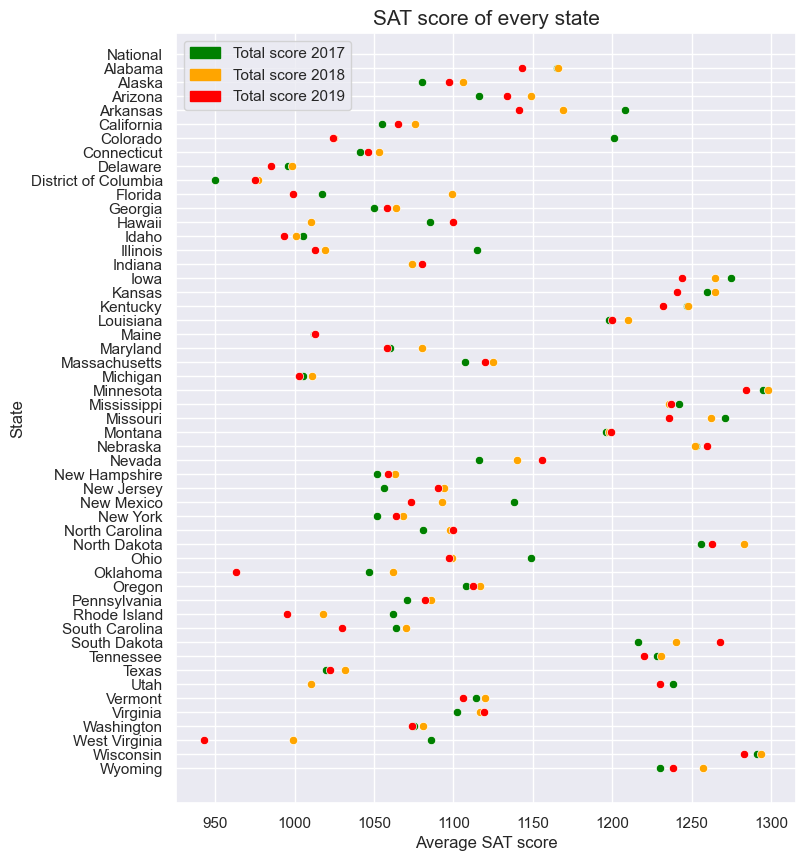

In [154]:
sns.set(rc={'figure.figsize':(8,10)})
sns.scatterplot(data=allresults, x='Total17', y='State',color='green')
sns.scatterplot(data=allresults, x='Total18', y='State',color='orange')
sns.scatterplot(data=allresults, x='Total19', y='State',color='red')
plt.xlabel('Average SAT score')
green_patch=mpatches.Patch(color='green',label='Total score 2017')
orange_patch = mpatches.Patch(color='orange', label='Total score 2018')
red_patch=mpatches.Patch(color='red',label='Total score 2019')
plt.legend(handles=[green_patch,orange_patch,red_patch])
plt.title('SAT score of every state',fontsize=15)

Average SAT score of every state range between 900 to 1300. When the points are located side by side with each other, this means that the particular state has stable test score. For example, Montana has very stable SAT score in the past 3 years. SAT score West Virginia seem to decrease a lot from 2017 to 2019. We have to analyze further to determine the actual performance.

Text(0.5, 1.0, 'ACT score of every state')

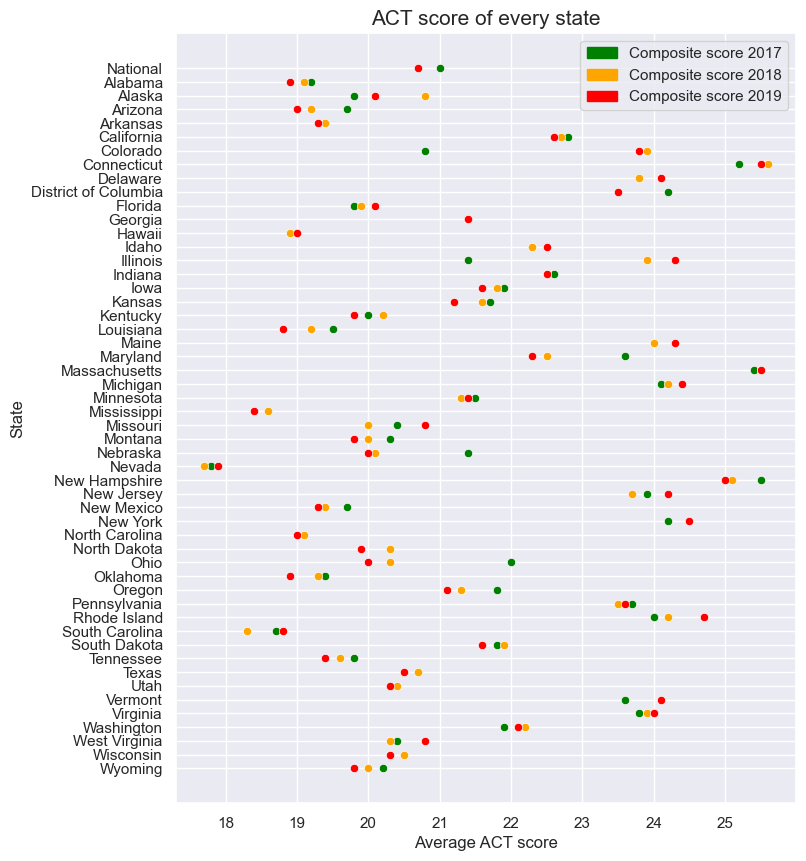

In [155]:
sns.set(rc={'figure.figsize':(8,10)})
sns.scatterplot(data=allresults, x='Composite17', y='State',color='green')
sns.scatterplot(data=allresults, x='Composite18', y='State',color='orange')
sns.scatterplot(data=allresults, x='Composite19', y='State',color='red')
plt.xlabel('Average ACT score')
green_patch=mpatches.Patch(color='green',label='Composite score 2017')
orange_patch = mpatches.Patch(color='orange', label='Composite score 2018')
red_patch=mpatches.Patch(color='red',label='Composite score 2019')
plt.legend(handles=[green_patch,orange_patch,red_patch])
plt.title('ACT score of every state',fontsize=15)

Average ACT score range between 17 to 26. Minnesota and Pennsylvania have stable ACT score.

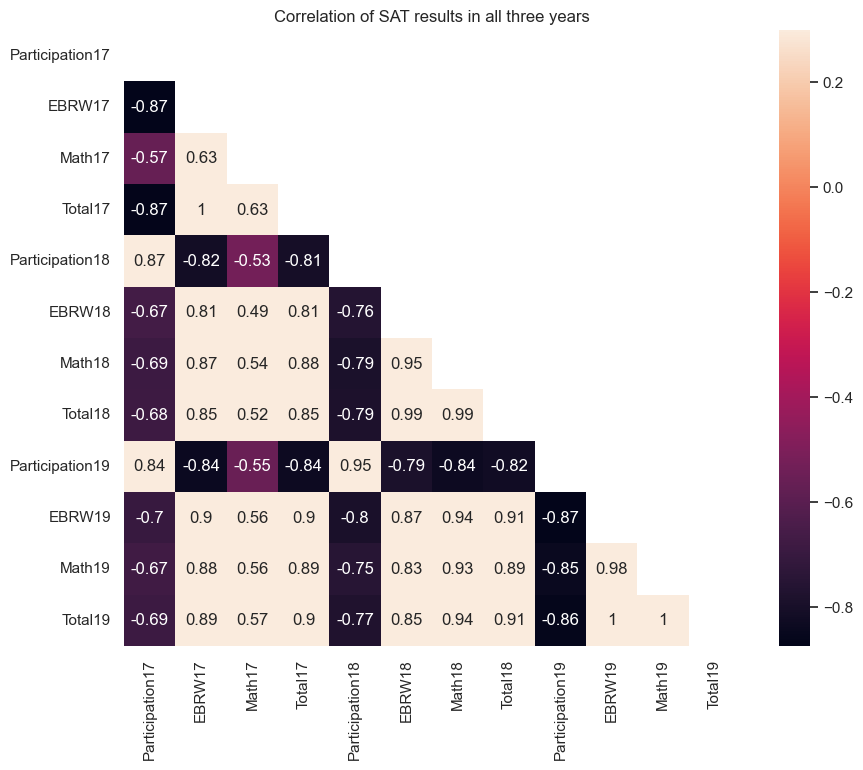

In [156]:
satcorr = satall.corr()
mask = np.zeros_like(satcorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(satcorr, mask=mask, vmax=.3, square=True,annot=True)
    plt.title('Correlation of SAT results in all three years')

Heatmap of correlation of dataset "satall". We can see that particular year's total average score is strongly correlated to particular year's EBRW and Math results. Higher total average score means higher score from the EBRW and Math subject.

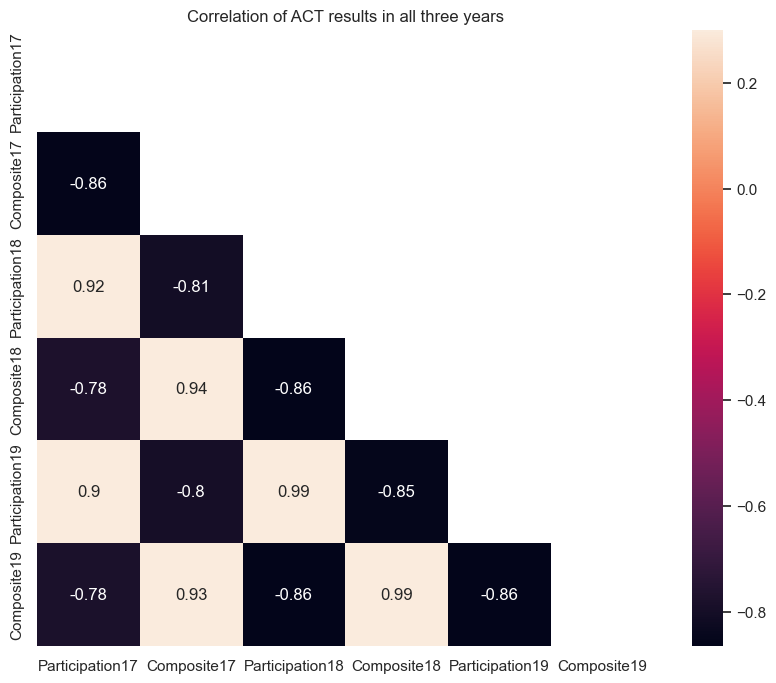

In [157]:
actcorr = actall.corr()
mask = np.zeros_like(actcorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(actcorr, mask=mask, vmax=.3, square=True,annot=True)
    plt.title('Correlation of ACT results in all three years')

Participation rate of each year is quite positively related all other years. This shows that participation rate has not fluctuated drastically  in the past 3 years. 

In [158]:
sat_participation = pd.melt(satall,id_vars='State',value_vars=['Participation17','Participation18','Participation19'])
act_participation = pd.melt(actall,id_vars='State',value_vars=['Participation17','Participation18','Participation19'])
sat_participation['variable'].replace({'Participation17':2017,
                                       'Participation18':2018,
                                       'Participation19':2019}, inplace=True)
act_participation['variable'].replace({'Participation17':2017,
                                       'Participation18':2018,
                                       'Participation19':2019},inplace=True)

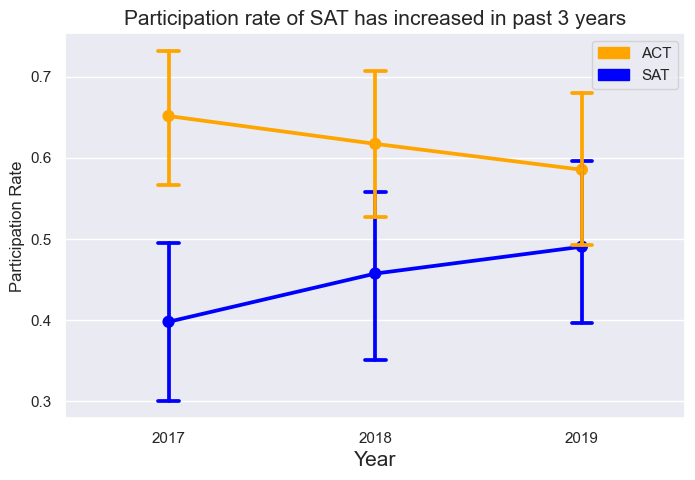

In [159]:
sns.set(rc={'figure.figsize':(8,5)})
sns.pointplot(data=sat_participation,x='variable',y='value',errorbar='ci',color='blue',capsize=.1)
sns.pointplot(data=act_participation, x='variable',y='value',errorbar='ci',color='orange',capsize=.1)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Participation Rate')
plt.title('Participation rate of SAT has increased in past 3 years', fontsize=15)
orange_patch = mpatches.Patch(color='orange', label='ACT')
blue_patch=mpatches.Patch(color='blue',label='SAT')
plt.legend(handles=[orange_patch,blue_patch])

Throughout the years, more and more students prefer SAT than ACT.

In [160]:
sat_overall_ave = pd.melt(satall,id_vars='State',value_vars=['Total17','Total18','Total19'])
act_overall_ave = pd.melt(actall,id_vars='State',value_vars=['Composite17','Composite18','Composite19'])
sat_overall_ave['variable'].replace({'Total17':'2017',
                                     'Total18':'2018',
                                     'Total19':'2019'},inplace=True)
act_overall_ave['variable'].replace({'Composite17':'2017',
                                     'Composite18':'2018',
                                     'Composite19':'2019'},inplace=True)

Text(0.5, 1.0, 'Most students score between 1050 and 1100 in SAT')

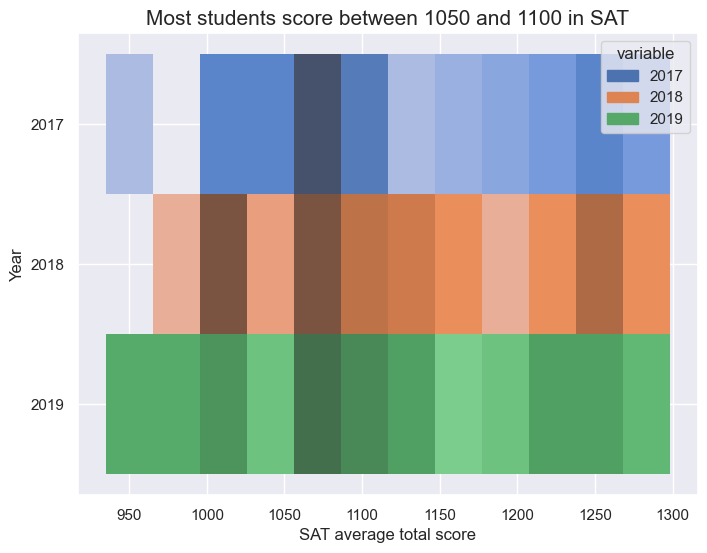

In [161]:
sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(data=sat_overall_ave,x='value',hue='variable',y='variable', bins=12)
plt.xlabel('SAT average total score')
plt.ylabel('Year')
plt.title('Most students score between 1050 and 1100 in SAT',fontsize=15)

Based on the histogram, the average score is not normally distributed. The mode of average score lies between 1050 and 1100.

Text(0.5, 1.0, 'Most students score around 20 in ACT')

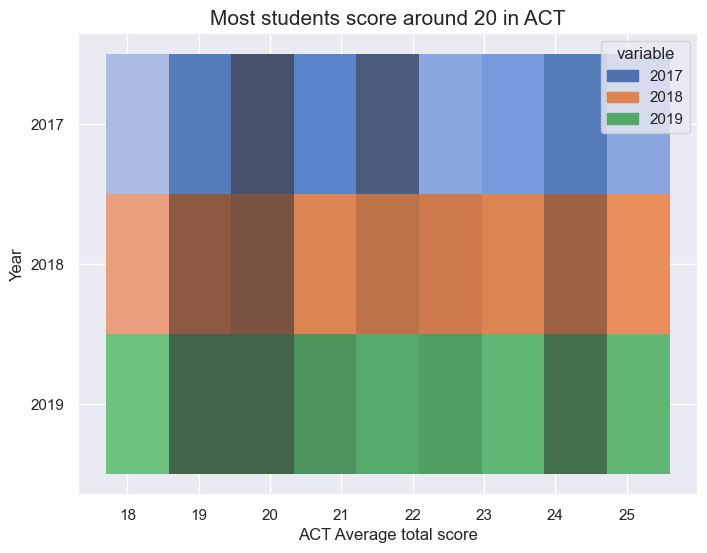

In [162]:
sns.set(rc={'figure.figsize':(8,6)})
sns.histplot(data=act_overall_ave,x='value',hue='variable',y='variable')
plt.xlabel('ACT Average total score')
plt.ylabel('Year')
plt.title('Most students score around 20 in ACT',fontsize=15)

Similar to SAT score, ACT average score is also not normally distributed. Mode of the average ACT score is around 20.

Text(0.5, 1.0, 'SAT score decreased in the past 3 years')

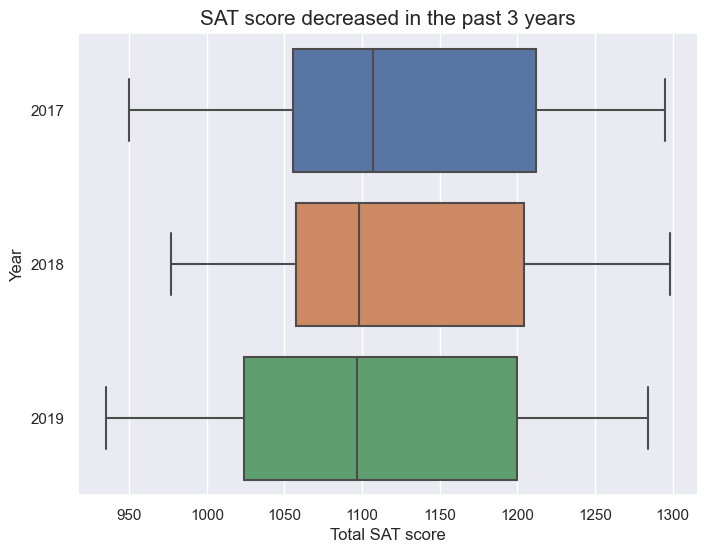

In [163]:
sns.boxplot(data=sat_overall_ave,x='value',y='variable')
plt.ylabel('Year')
plt.xlabel('Total SAT score')
plt.title('SAT score decreased in the past 3 years', fontsize=15)

There is no outlier in our data. Median SAT score has dropped from more than 1100 in 2017 to less than 1100 in 2019. Overall SAT score (Maximum, minimum, median, first quartile and third quartile) in 2019 have shifted towards the left as compared to SAT score in 2017. Overall student's performance has dropped.

Text(0.5, 1.0, 'Interquartile range of ACT score did not \nchange much in the past 3 years')

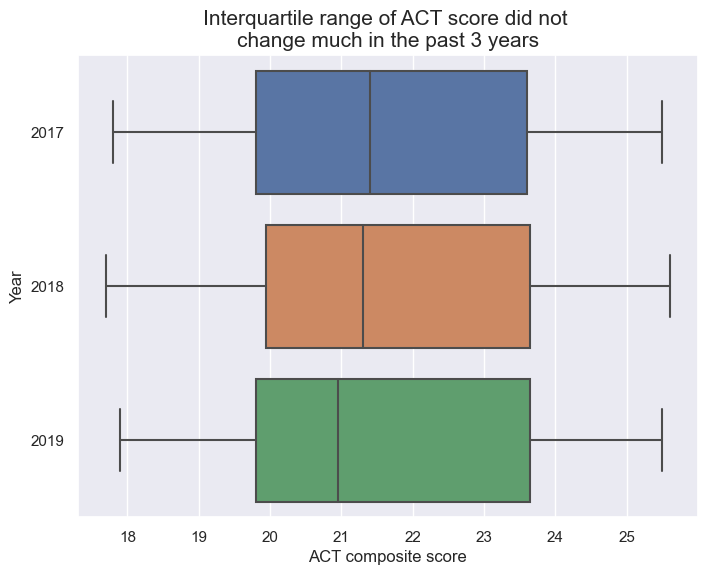

In [164]:
sns.boxplot(data=act_overall_ave,x='value',y='variable')
plt.ylabel('Year')
plt.xlabel('ACT composite score')
plt.title('Interquartile range of ACT score did not \nchange much in the past 3 years', fontsize=15)

There is no outlier in our ACT data. Median ACT score has decreased from more than 21 in 2017 to less than 21 in 2019. However, the minimum ACT score in 2019 is higher than 2017 and 2018.

Text(0, 0.5, 'Average ACT Score')

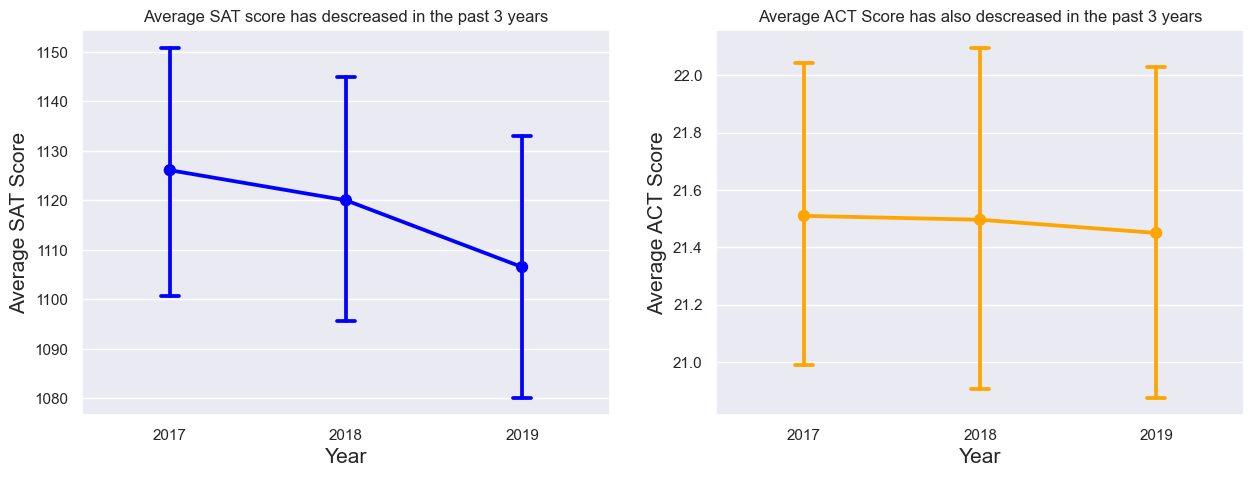

In [165]:
plt.figure(figsize= (15,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('Average SAT score has descreased in the past 3 years')
sns.pointplot(data=sat_overall_ave,x='variable',y='value',errorbar='ci',color='blue',capsize=.1,ax=ax1)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average SAT Score',fontsize=15)
ax2 = plt.subplot(1,2,2)
ax2.set_title('Average ACT Score has also descreased in the past 3 years')
sns.pointplot(data=act_overall_ave, x='variable',y='value',errorbar='ci',color='orange',capsize=.1,ax=ax2)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average ACT Score',fontsize=15)

Average SAT and ACT results have both decreased from 2017 to 2019 where the decrease in average SAT score is more significant as compared to average ACT score.

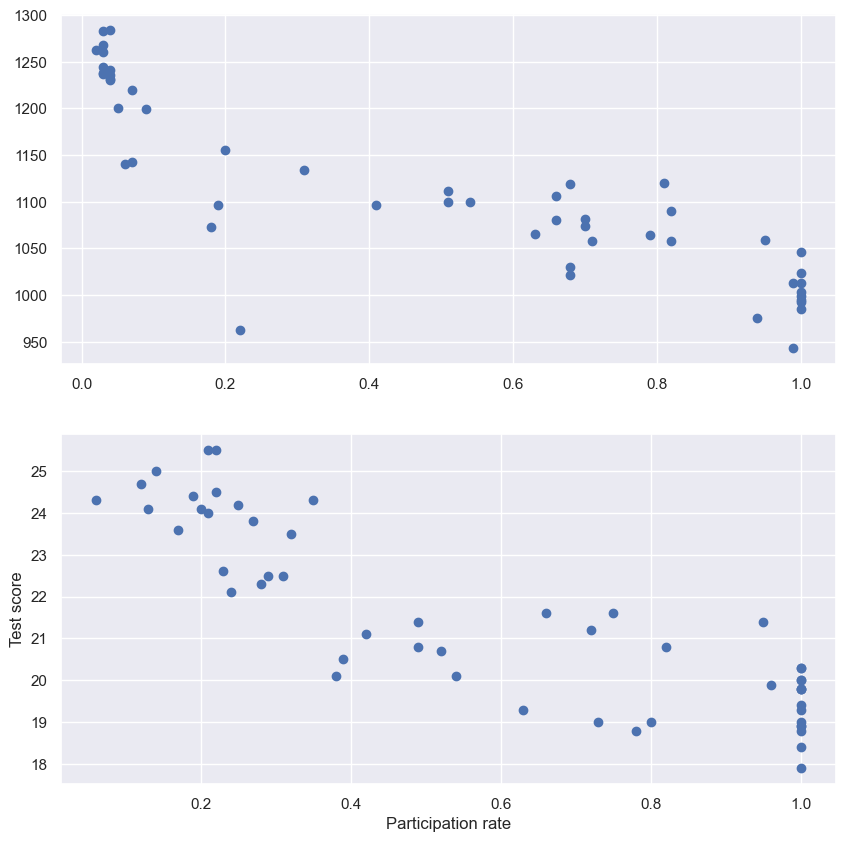

In [209]:
sns.set(rc={'figure.figsize':(10,10)})
fig, axs=plt.subplots(2)
axs[0].scatter(allresults['satparticipation19'],allresults['Total19'])
plt.xlabel('Participation rate')
plt.ylabel('Test score')
axs[1].scatter(allresults['actparticipation19'],allresults['Composite19'])



We can see there is some relation between participation rate and test score. The higher the participation, the lower the state's test score. This could be due to only well prepared students will take the test in the particulat state with high test score.

In [168]:
satall['satimprovement18'] = satall.Total18-satall.Total17
sat_comparison = pd.DataFrame([satall['satimprovement18'],satall['State']]).T

Text(0.5, 0, 'Score difference in 2018')

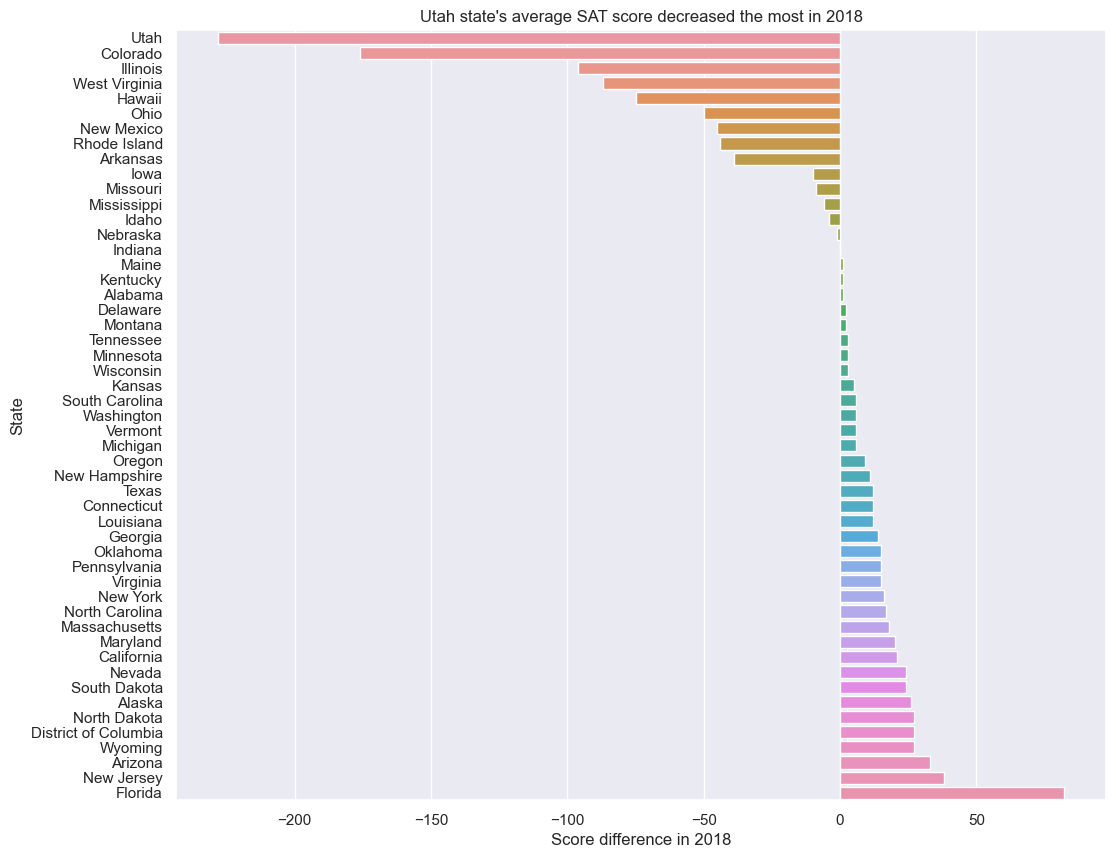

In [169]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='satimprovement18',y='State',data=sat_comparison,\
    order=sat_comparison.dropna().sort_values('satimprovement18').State)
plt.title('Utah state\'s average SAT score decreased the most in 2018')
plt.xlabel('Score difference in 2018')

In 2018, Utah has the worst year on year SAT performance. More than half of the states show improvement while Florida improved the most.

In [170]:
actall['actimprovement18'] = actall.Composite18-actall.Composite17
act_comparison=pd.DataFrame([actall['actimprovement18'],actall['State']]).T

Text(0.5, 0, 'Score difference in 2018')

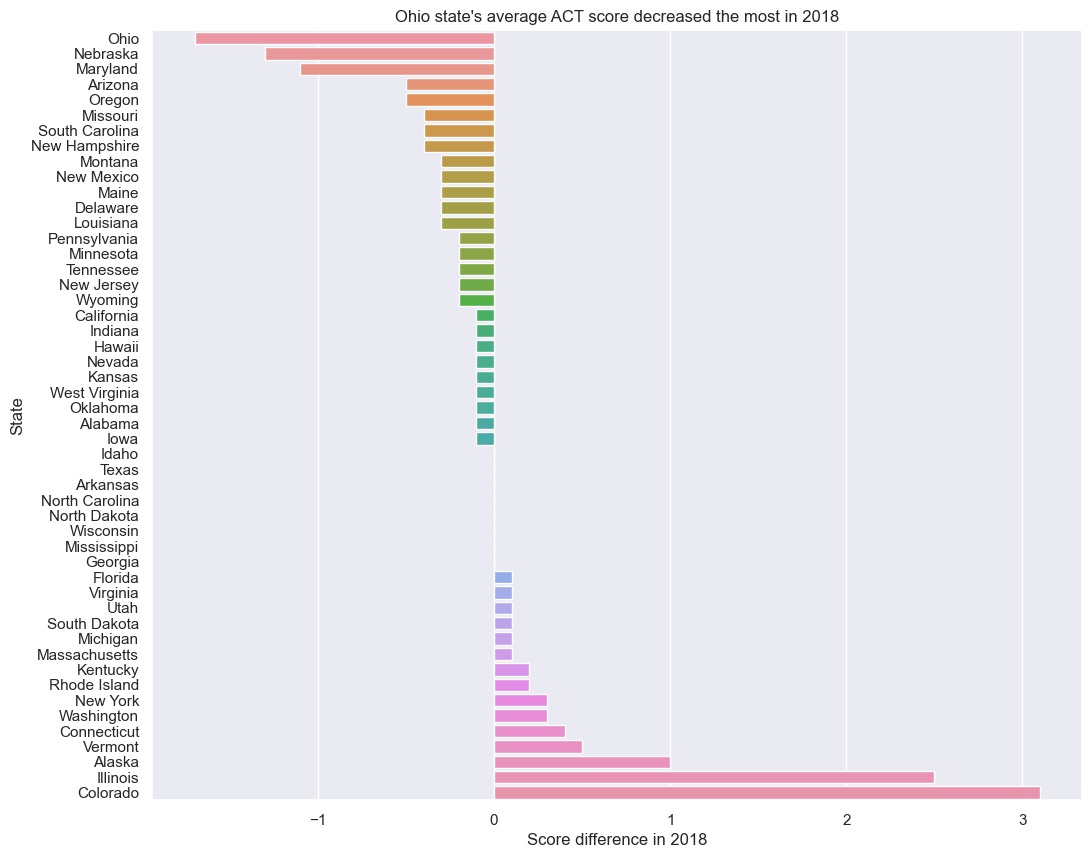

In [171]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='actimprovement18',y='State',data=act_comparison,\
    order=act_comparison.dropna().sort_values('actimprovement18').State)
plt.title('Ohio state\'s average ACT score decreased the most in 2018')
plt.xlabel('Score difference in 2018')

In 2018, Ohio has the worst year on year ACT performance while Colorado has the most improvement.

## In order to compare each state's latest results and the past years performance, we take the score in 2019 and compare with the mean score of 2017 and 2018.

In [172]:
# Add a column for SAT average score of 2017 and 2018
allresults['satpastaveragescore'] = (allresults.Total17+allresults.Total18)/2

# Add a column for ACT average score of 2017 and 2018
allresults['actpastaveragescore'] = (allresults.Composite17+allresults.Composite18)/2

# Add a column to show the difference between the score of 2019 and average score of 2017 and 2018
allresults['finalsatcomparison'] = allresults.Total19-allresults.satpastaveragescore
allresults['finalactcomparison'] = allresults.Composite19-allresults.actpastaveragescore

In [173]:
sat_final_comparison = pd.DataFrame(([allresults['finalsatcomparison'],actall['State']])).T
act_final_comparison = pd.DataFrame(([allresults['finalactcomparison'],actall['State']])).T

Text(0.5, 0, '2019 SAT average score compared to past years results')

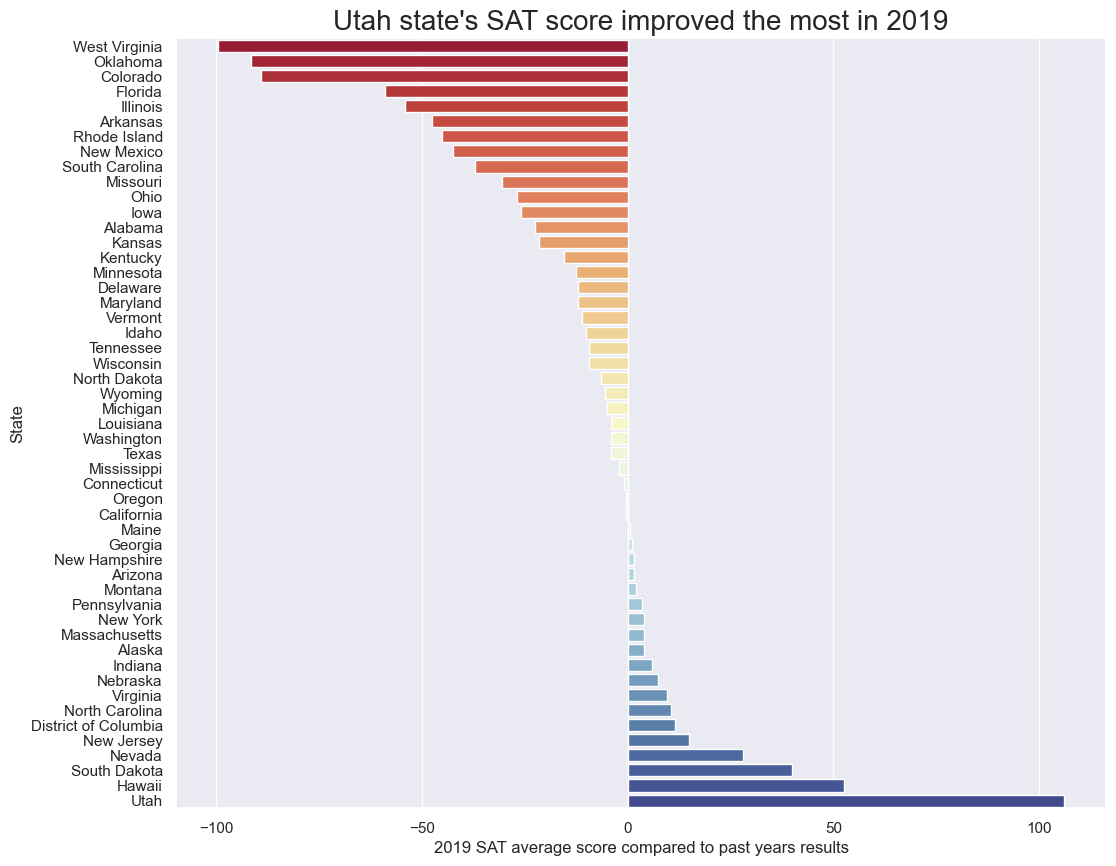

In [174]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='finalsatcomparison',y='State',data=sat_final_comparison,\
    order=sat_final_comparison.dropna().sort_values('finalsatcomparison').State,palette='RdYlBu')
plt.title('Utah state\'s SAT score improved the most in 2019',fontsize=20)
plt.xlabel('2019 SAT average score compared to past years results')

From the chart, we know that the top 3 states that require most attention is **West Virginia**, **Oklahoma** and **Colorado**. These 3 states have the most worrisome year on year SAT performance.

Text(0.5, 0, '2019 ACT average score compared to past years results')

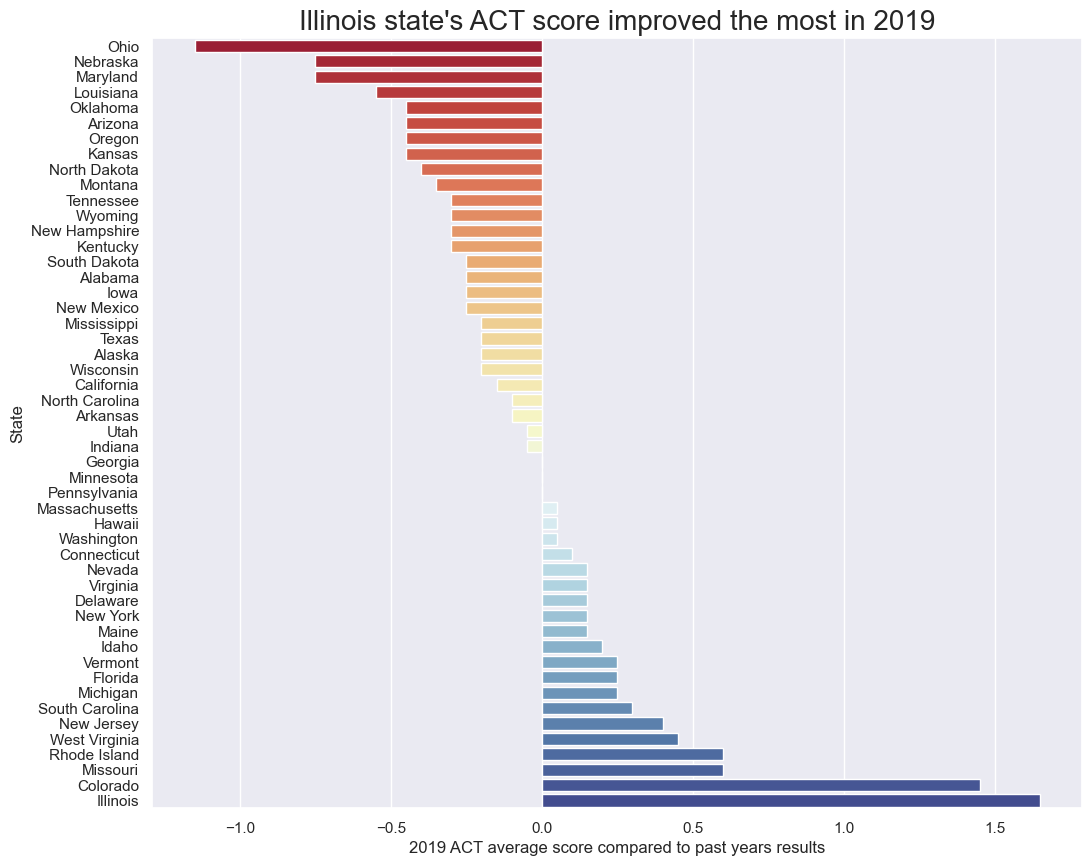

In [175]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='finalactcomparison',y='State',data=act_final_comparison,\
    order=act_final_comparison.dropna().sort_values('finalactcomparison').State,palette='RdYlBu')
plt.title('Illinois state\'s ACT score improved the most in 2019', fontsize=20)
plt.xlabel('2019 ACT average score compared to past years results')

On the other hand, the top 3 states with the most worrisome year on year ACT performance are **Ohio**, **Nebraska** and **Maryland**.

The problem here is that some states are doing well in SAT but not so well in ACT and vice versa. For example, Colorado is one of the top three worst performance in SAT but they improved a lot in ACT.
In order to solve this problem we need to look at the overall results as a whole. By converting the SAT score to match with ACT score scale, we are able to compare the results in a single graph.

In [176]:
# Conversion rate taken from https://blog.prepscholar.com/act-to-sat-conversion
sat_act_conversion=pd.read_excel('data/sat_act_conversion.xlsx')

In [177]:
# Display the table we just imported
sat_act_conversion.head()

,CT Composite Score,Estimated SAT Composite,Estimated SAT Composite Range
0,36,2390,2320-2400
1,35,2260,2320-2310
2,34,2170,2140-2220
3,33,2090,2070-2130
4,32,2040,2020-2060


In [178]:
# Check if any null value and the data types
sat_act_conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   CT Composite Score             28 non-null     int64 
 1   Estimated SAT Composite        28 non-null     int64 
 2   Estimated SAT Composite Range  28 non-null     object
dtypes: int64(2), object(1)
memory usage: 800.0+ bytes


In [179]:
act_to_sat = (sat_act_conversion['Estimated SAT Composite'].max()-sat_act_conversion['Estimated SAT Composite'].min())\
    /(sat_act_conversion['CT Composite Score'].max()-sat_act_conversion['CT Composite Score'].min())
print (f'Average 1 point of ACT score is equal to {act_to_sat:.2f} point of SAT score')

Average 1 point of ACT score is equal to 59.63 point of SAT score


In [180]:
# Convert SAT score to ACT score scale
allresults['finalconvertedsat']=allresults['finalsatcomparison']/act_to_sat

In [181]:
# Combine both SAT and ACT score together
allresults['overallcomparison']=allresults['finalconvertedsat']+allresults['finalactcomparison']

Text(0.5, 0, '2019 overall average score compared to past years results')

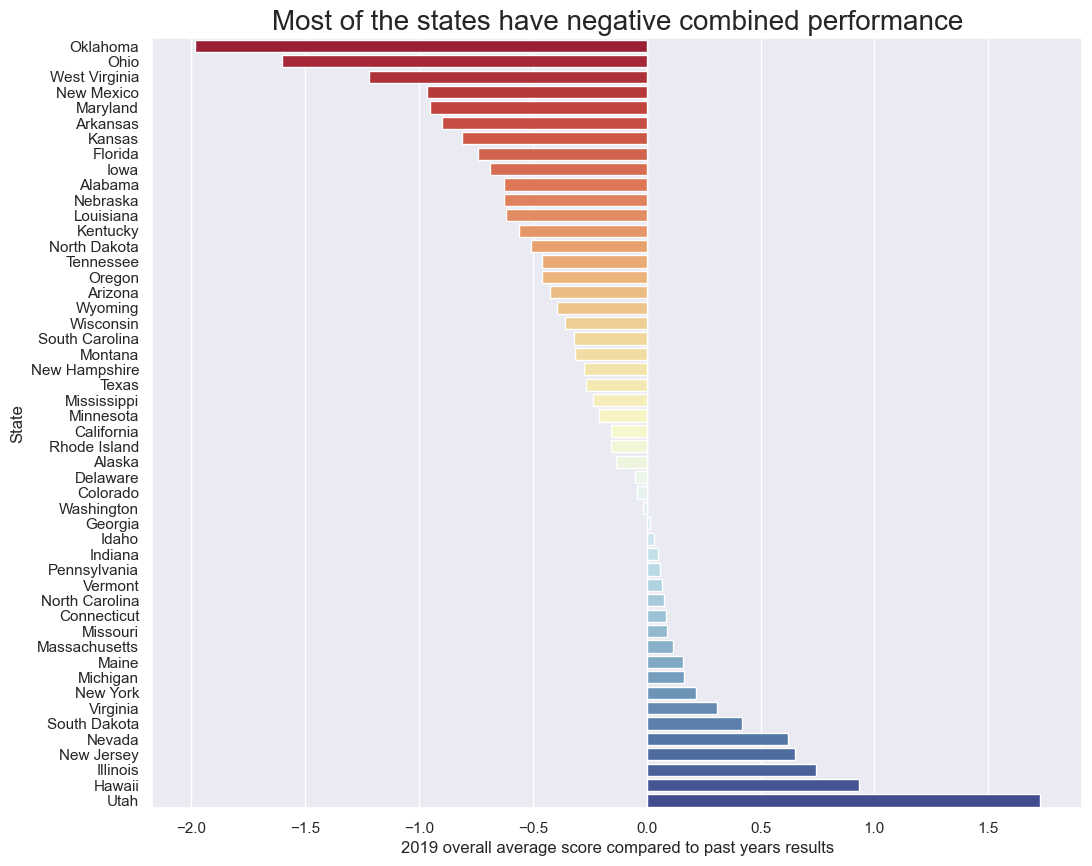

In [182]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='overallcomparison',y='State',data=allresults,\
    order=allresults.dropna().sort_values('overallcomparison').State,palette='RdYlBu')
plt.title('Most of the states have negative combined performance', fontsize=20)
plt.xlabel('2019 overall average score compared to past years results')

With the combined results of SAT and ACT, Utah state has improved the most in 2019. This is very surprising considering that Utah state's SAT score decreased the most in 2018. Relevant organisations have been doing well to drive Utah's results back on track.
However, **Oklahoma, Ohio and West Virginia** are the top three states with negative growth in the overall results with the combined score dropped more than 1 point. We should focus most of our resources in these three states.

In [183]:
allresults[(allresults.State=='Oklahoma') | (allresults.State=='Ohio') | (allresults.State=='West Virginia')]\
    [['State','Composite17','Composite18','Composite19','actparticipation17','actparticipation18','actparticipation19']]

,State,Composite17,Composite18,Composite19,actparticipation17,actparticipation18,actparticipation19
36,Ohio,22.0,20.3,20.0,0.75,1.00,1.00
37,Oklahoma,19.4,19.3,18.9,1.00,1.00,1.00
49,West Virginia,20.4,20.3,20.8,0.69,0.65,0.49


In [184]:
allresults[(allresults.State=='Oklahoma') | (allresults.State=='Ohio') | (allresults.State=='West Virginia')]\
    [['State','Total17','Total18','Total19','satparticipation17','satparticipation18','satparticipation19']]

,State,Total17,Total18,Total19,satparticipation17,satparticipation18,satparticipation19
36,Ohio,1149.0,1099.0,1097.0,0.12,0.18,0.19
37,Oklahoma,1047.0,1062.0,963.0,0.07,0.08,0.22
49,West Virginia,1086.0,999.0,943.0,0.14,0.28,0.99


We are taking a deep dive into the top three state with negative result growth. Oklahoma state has 100% participation rate in ACT every year. On the other hand, more and more students are also taking SAT. ACT score has never improved since 2017 while there is some improvement in SAT in 2018 but followed by a huge step down in 2019 . Actions are required to stop the state's result from going further downhill.

In [185]:
# Separate Oklahoma, Ohio and West Virginia SAT result into new data frame
oklahoma_sat_result= sat_overall_ave[sat_overall_ave.State=='Oklahoma']
ohio_sat_result = sat_overall_ave[sat_overall_ave.State=='Ohio']
westvirginia_sat_result = sat_overall_ave[sat_overall_ave.State=='West Virginia']

Text(0.5, 1.0, 'Oklahoma shows improvement in SAT score in 2018')

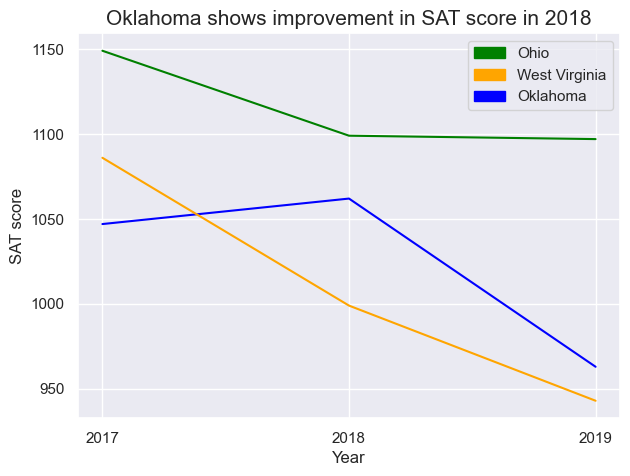

In [186]:
sns.set(rc={'figure.figsize':(7,5)})
sns.lineplot(data=oklahoma_sat_result,x='variable',y='value',color='blue')
sns.lineplot(data=ohio_sat_result,x='variable',y='value',color='green')
sns.lineplot(data=westvirginia_sat_result,x='variable',y='value',color='orange')
green_patch=mpatches.Patch(color='green',label='Ohio')
orange_patch = mpatches.Patch(color='orange', label='West Virginia')
blue_patch=mpatches.Patch(color='blue',label='Oklahoma')
plt.legend(handles=[green_patch,orange_patch,blue_patch])
plt.ylabel('SAT score')
plt.xlabel('Year')
plt.title('Oklahoma shows improvement in SAT score in 2018',fontsize=15)

Generally, all three states have negative improvement from 2017 to 2019. Oklahoma is the only state that does not have continuous decrease on SAT score from 2017 to 2019. Ohio has the highest SAT score amongst the three states.

In [187]:
# Separate Oklahoma, Ohio and West Virginia ACT result into new data frame
oklahoma_act_result= act_overall_ave[act_overall_ave.State=='Oklahoma']
ohio_act_result = act_overall_ave[act_overall_ave.State=='Ohio']
westvirginia_act_result = act_overall_ave[act_overall_ave.State=='West Virginia']

Text(0.5, 1.0, 'West Virginiashows improvement in ACT score in 2018')

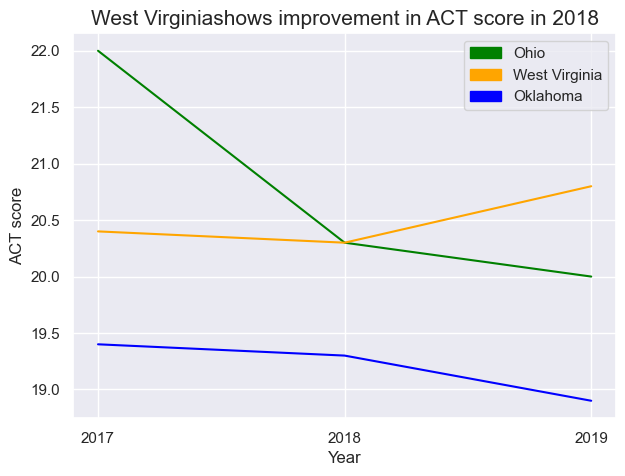

In [188]:
sns.set(rc={'figure.figsize':(7,5)})
sns.lineplot(data=oklahoma_act_result,x='variable',y='value',color='blue')
sns.lineplot(data=ohio_act_result,x='variable',y='value',color='green')
sns.lineplot(data=westvirginia_act_result,x='variable',y='value',color='orange')
green_patch=mpatches.Patch(color='green',label='Ohio')
orange_patch = mpatches.Patch(color='orange', label='West Virginia')
blue_patch=mpatches.Patch(color='blue',label='Oklahoma')
plt.legend(handles=[green_patch,orange_patch,blue_patch])
plt.ylabel('ACT score')
plt.xlabel('Year')
plt.title('West Virginiashows improvement in ACT score in 2018',fontsize=15)

West Virginia has actually improved their ACT score in 2019 as compared to 2017 and 2018. Oklahoma has the lowest ACT score amongst the three states.

# Conclusion

Ideally we would want to put in effort in every state to improve the overall results of the country. However, due to resources constraint, it is advised to focus more of the resources on **Oklahoma, Ohio and West Virginia** to prevent the results in these states get worsen. 